### Import Required Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

### Load Data

In [76]:
df = pd.read_csv("../../data/Salary_dataset.csv")
df.sample(5)

,Unnamed: 0,YearsExperience,Salary
21,21,7.2,98274.0
24,24,8.8,109432.0
12,12,4.1,56958.0
26,26,9.6,116970.0
0,0,1.2,39344.0


In [77]:
# Drop unwnted columns
df = df.drop("Unnamed: 0", axis=1)
df.sample(5)

,YearsExperience,Salary
24,8.8,109432.0
1,1.4,46206.0
13,4.2,57082.0
12,4.1,56958.0
3,2.1,43526.0


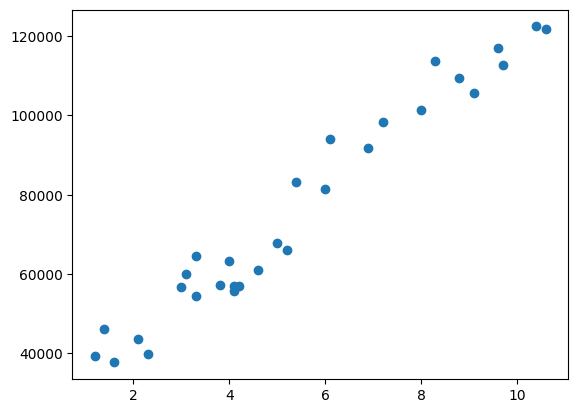

In [78]:
# visualize data
plt.scatter(df['YearsExperience'], df['Salary'])

### OLS

In [79]:
# calculate menas
y_mean = np.mean(df['Salary'])
x_mean = np.mean(df['YearsExperience'])

# calculate m
num = np.sum((df['Salary'] - y_mean) * (df['YearsExperience'] - x_mean))
den = np.sum((df['YearsExperience'] - x_mean)**2)
m_ols = num/den

# calculate c
c_ols = y_mean - m_ols * x_mean

print('c', c_ols)
print('m', m_ols)

c 24848.2039665232
m 9449.962321455076


In [80]:
# append predicted values
df['ols_pred_sal'] = m_ols * df['YearsExperience'] + c_ols
df.sample(5)

,YearsExperience,Salary,ols_pred_sal
13,4.2,57082.0,64538.045717
28,10.4,122392.0,123127.812110
22,8.0,101303.0,100447.902538
15,5.0,67939.0,72098.015574
29,10.6,121873.0,125017.804574


In [81]:
# calculate metrics
print('mae', mean_absolute_error(df['Salary'], df['ols_pred_sal']))
print('mse', mean_squared_error(df['Salary'], df['ols_pred_sal']))
print('r2', r2_score(df['Salary'], df['ols_pred_sal']))
print('rmse', root_mean_squared_error(df['Salary'], df['ols_pred_sal']))


mae 4644.201289443536
mse 31270951.722280946
r2 0.9569566641435086
rmse 5592.04360876066


### GD

In [82]:
X = df['YearsExperience']
Y = df['Salary']

lr = 0.01
m = 0  # Starting with m = 0
c = 0  # Starting with c = 0

ms = []
cs = []
errs = []

for i in range(1000):
    m_grad = 10
    c_grad = 10
    n = len(X)  # Number of data points
    
    # Calculate gradients based on the entire dataset
    for j in range(n):
        # Error is (Y - (m*X + c))^2
        m_grad += -2 * X[j] * (Y[j] - (m * X[j] + c))  # Partial derivative wrt m
        c_grad += -2 * (Y[j] - (m * X[j] + c))  # Partial derivative wrt c

    # print(m_grad)
    # Average gradients
    m_grad /= n
    c_grad /= n

    # Store the current values of m, c, and total error
    ms.append(m)
    cs.append(c)
    errs.append(sum([(Y[j] - (m * X[j] + c))**2 for j in range(n)]))

    # Update m and c
    m -= lr * m_grad
    c -= lr * c_grad

print('c', c)
print('m', m)

c 24473.890458719936
m 9504.894186274774


In [83]:
# append predicted values
df['gd_pred_sal'] = m * df['YearsExperience'] + c
df.sample(5)

,YearsExperience,Salary,ols_pred_sal,gd_pred_sal
20,6.9,91739.0,90052.943985,90057.660344
26,9.6,116970.0,115567.842252,115720.874647
19,6.1,93941.0,82492.974127,82453.744995
21,7.2,98274.0,92887.932681,92909.128600
6,3.1,60151.0,54143.087163,53939.062436


In [84]:
# calculate metrics
print('mae', mean_absolute_error(df['Salary'], df['gd_pred_sal']))
print('mse', mean_squared_error(df['Salary'], df['gd_pred_sal']))
print('r2', r2_score(df['Salary'], df['gd_pred_sal']))
print('rmse', root_mean_squared_error(df['Salary'], df['gd_pred_sal']))


mae 4637.191464764421
mse 31300364.655839052
r2 0.9569161783025623
rmse 5594.672881933228


### Visualize Prediction

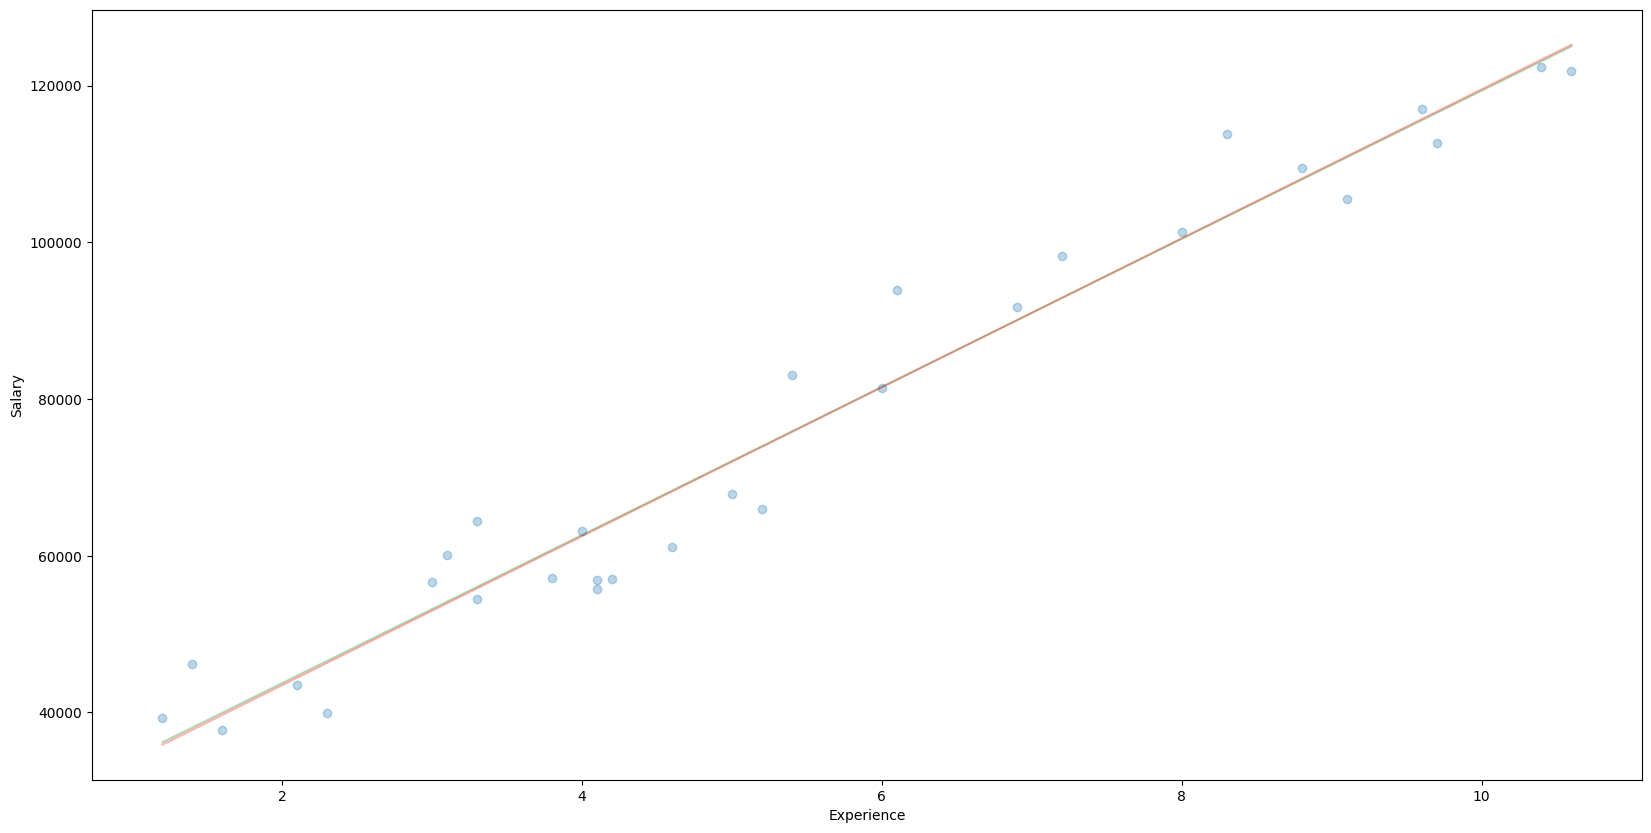

In [89]:
plt.figure(figsize=(20, 10))
plt.plot(df['YearsExperience'], df['ols_pred_sal'], alpha=0.3, color='green')
plt.plot(df['YearsExperience'], df['gd_pred_sal'], alpha=0.3, color='red')
plt.scatter(df['YearsExperience'], df['Salary'], alpha=0.3)
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.show()